<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT21/blob/jacwah/Lab_4/jacwah_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Differential equations**
**Jacob Wahlgren**

# **Abstract**

The theta method for solving scalar intial value problems is implemented, and the convergence and stability is analyzed using sample problems.

#**About the code**

The code was written by Jacob Wahlgren, based on a template by Johan Hoffman.

In [78]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)
# Copyright (C) 2021 Jacob Wahlgren (jacobwah@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# **Introduction**

Differential equations are equations involving a function $f$ and its derivatives, where the goal usually is to find a closed form for $f$, or approximate the values of $f$ over some domain. A common type of problem is the scalar initial value problem, which is a type of ordinary differential equation. A scalar intial value problem (IVP) can be stated as follows, where $\dot u$ is the time derivative of $u$, $f$ is some function and $u_0$ is constant.

$\displaystyle \dot u(t) = f(u(t), t) \\ u(0) = u_0$

In a scalar IVP, $u$ is $[0,T] \rightarrow R$. This can be extended to systems of IVPs where $u$ is $[0,T] \rightarrow R^N$. To solve an IVP the domain is discretized, and then the following equation is approximated.

$\displaystyle u(t_n) = u(t_{n-1}) + \int_{t_{n-1}}^{t_n} f(u(t),t)dt$

Depending which quadrature rule is used, a different method is obtained.

Since I was ill this week I was only able to solve problem 1.

# **Method**

### Time-stepping for scalar IVP

I base my time-stepping implementation on the theta method as defined in Algorithm 13.3. To find a root I use the general function `optimize.root_scalar` from Scipy. The `theta` parameter determines the mix between the previous and current function value in the quadrature, where 1 gives the explicit Euler method, 0 gives the implicit Euler method and $\frac{1}{2}$ give the trapezoidal method. The `k` parameter determines the step size.

In [121]:
def theta_method(f, u0, t0, T, k, theta):
    t = t0
    u = u0
    while t < T:
        g = lambda u: u - u0 - k*((1-theta)*f(u) + theta*f(u0))
        u = optimize.root_scalar(g, x0=0, x1=1).root
#        u = optimize.root_scalar(g, x0=u0, x1=(u0+k*f(u0))).root
        u0 = u
        t += k
    return u

# **Results**

### Time-stepping for scalar IVP

I use the following problem to illustrate the result.

$\displaystyle \dot u(t) = 2u(t) = f(u(t),t)\\ u(0) = 1$

The problem has the solution $u(t) = e^{2t}$.

Text(0.5, 0, 't')

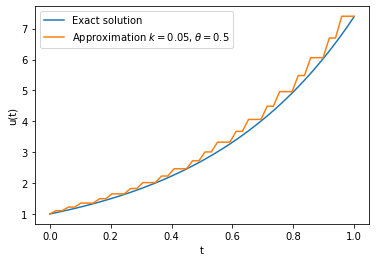

In [159]:
f = lambda u: 2*u
u_exact = lambda t: np.exp(2*t)
u0 = 1

ts = np.linspace(0, 1)

plt.plot(ts, u_exact(ts), label="Exact solution")
u_approx = lambda t: theta_method(f, u0, 0, t, 0.05, 0.5)
plt.plot(ts, [u_approx(t) for t in ts], label=f"Approximation $k=0.05,\\theta=0.5$")
plt.legend()
plt.ylabel("u(t)")
plt.xlabel("t")

The accuracy increases as $k$ decreases, which is shown by the following plot.

Text(0.5, 0, 't')

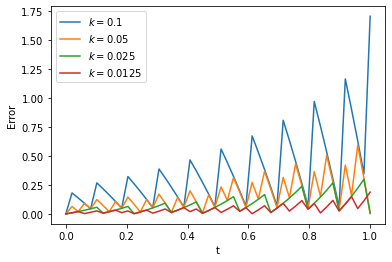

In [143]:
for k in (0.1, 0.05, 0.025, 0.0125):
    u_approx = lambda t: theta_method(f, u0, 0, t, k, 0.5)
    plt.plot(ts, [abs(u_exact(t)-u_approx(t)) for t in ts], label=f"$k={k}$")

plt.legend()
plt.ylabel("Error")
plt.xlabel("t")

To test the stability of the time-stepping method I use the following problem.

$\displaystyle \dot u(t) = \lambda u(t) \quad u(0) = 1$

Depending on the values of $\theta,k,\lambda$ the approximation converges to 0, or diverges. To test if a sequence converges I examine the first few values and see if they approach 0. I illustrate the stability of the implicit Euler method below for $k=1$. The green region is where the method is A-stable. To limit the computation time only a limited set of points are evaluated, so the resulting plot is not completely round, but it would be if more points were evaluated.

In [ ]:
k = 1

def conv(re, im):
    l = complex(re, im)
    f = lambda u: l*u
    u_last = None
    for t in np.linspace(0, 10, num=10):
        u = theta_method(f, complex(1,0), 0, t, k, 0)
        if u_last is not None and abs(u) >= abs(u_last):
            return 0
        u_last = u
    #print(l)
    return 1

xs = np.arange(-0.5, 2.5, 0.1)
ys = np.arange(-1.5, 1.5, 0.1)
xx, yy = np.meshgrid(xs, ys, sparse=True)
z = np.vectorize(conv)(xx, yy)

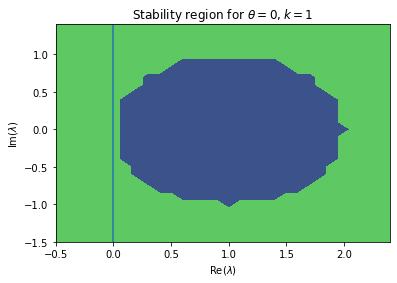

In [156]:
plt.contourf(xs, ys, z, levels=1)
plt.xlabel("Re($\\lambda$)")
plt.ylabel("Im($\\lambda$)")
plt.title("Stability region for $\\theta=0,k=1$")
plt.axvline(0)

# **Discussion**

Time-stepping is generally applicable to many types of problems. As long as an appropriate step size is used accurate results are possible. Many variations are possible based on what quadrature rules are used, and these have different stability properties, thus it is important to adapt the method to the problem at hand. As usual, the more computing time is available, the better approximation is possible.